# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [86]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [88]:
# Visit the website
url='https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [89]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [90]:
# Extract all rows of data
text_elems = soup.select('tr')
print(text_elems)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [91]:
rows = soup.select('table tr')

# Create an empty list to store dictionaries
mars_temperature = []

# Loop through each row (starting from index 1 to skip the header row)
for row in rows[1:]:
    # Extract data from each column in the row
    columns = row.find_all('td')
    
    # Create a dictionary for each row and append to the list
    article_dict = {
        'id': int(columns[0].text),
        'terrestrial_date': columns[1].text,
        'sol': int(columns[2].text),
        'ls': int(columns[3].text),
        'month': int(columns[4].text),
        'min_temp': float(columns[5].text),
        'pressure': float(columns[6].text)
    }
    
    mars_temperature.append(article_dict)



In [92]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temperature)

# Print the DataFrame
print(df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [93]:
# Confirm DataFrame was created successfully
df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [94]:
# Convert 'sol', 'ls', and 'month' to integers
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Display updated data types
print(df.dtypes)

id                    int64
terrestrial_date     object
sol                   int32
ls                    int32
month                 int32
min_temp            float64
pressure            float64
dtype: object


In [95]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'id' to object
df['id'] = df['id'].astype('object')

# Convert 'sol', 'ls', and 'month' to int32
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')

In [96]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [97]:

# Display the count for each unique month on Mars
# month_counts = df['month'].value_counts()
# print(month_counts)
month_counts_sorted = df['month'].value_counts().sort_index()
print(month_counts_sorted)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [98]:
# 2. How many Martian days' worth of data are there?
total_martian_days = df['sol'].nunique()
print(total_martian_days)

1867


In [99]:
# 3. What is the average low temperature by month?
average_month = df.groupby('month')['min_temp'].mean()
print(average_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


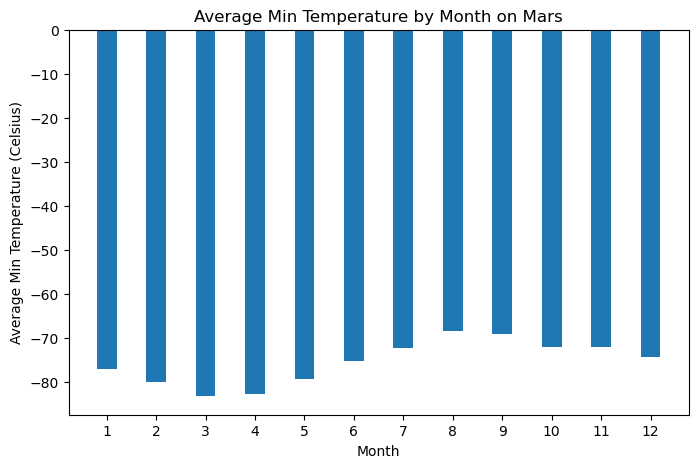

In [100]:
# Plot the average temperature by month
plt.figure(figsize=(8, 5))
plt.bar(average_month.index, average_month, width=0.4)
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (Celsius)')
plt.title('Average Min Temperature by Month on Mars')
plt.xticks(average_month.index)  # Ensure all months are displayed on the x-axis
plt.show()

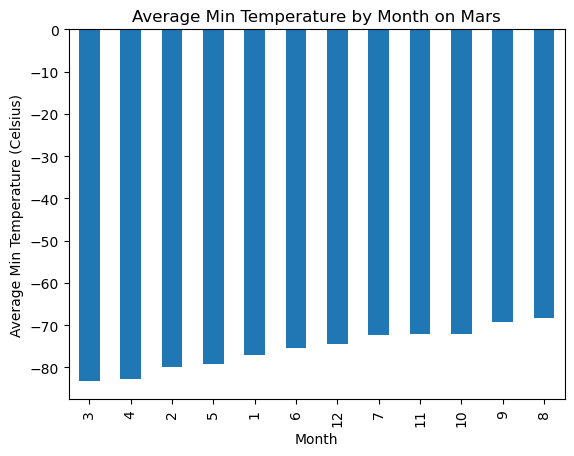

In [101]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average low temperature by month
average_month_sorted = average_month.sort_values()
average_month_sorted
# average_month_sorted = average_month_sorted.groupby('month')['min_temp'].mean().reset_index()

average_month_sorted.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (Celsius)')
plt.title('Average Min Temperature by Month on Mars')
plt.show()


In [102]:
# 4. Average pressure by Martian month
martian_month = df.groupby('month')['pressure'].mean()
print(martian_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


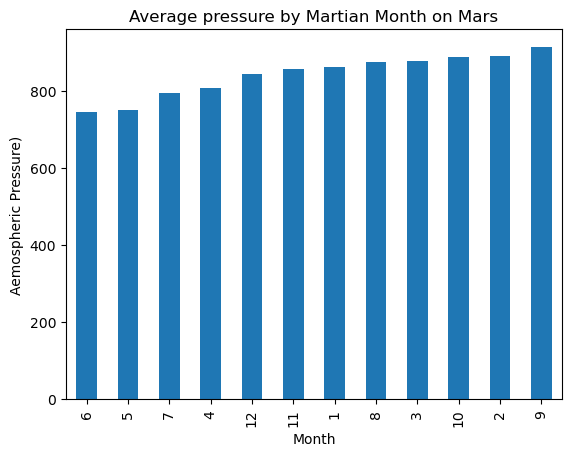

In [103]:
# Plot the average pressure by Martian month
martian_month = martian_month.sort_values()
martian_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Aemospheric Pressure)')
plt.title('Average pressure by Martian Month on Mars')
plt.show()

In [104]:
# # 5. How many terrestrial (earth) days are there in a Martian year?
# terrestria_month = df.groupby('terrestrial_date')['min_temp'].count_values()
# print(terrestria_month)

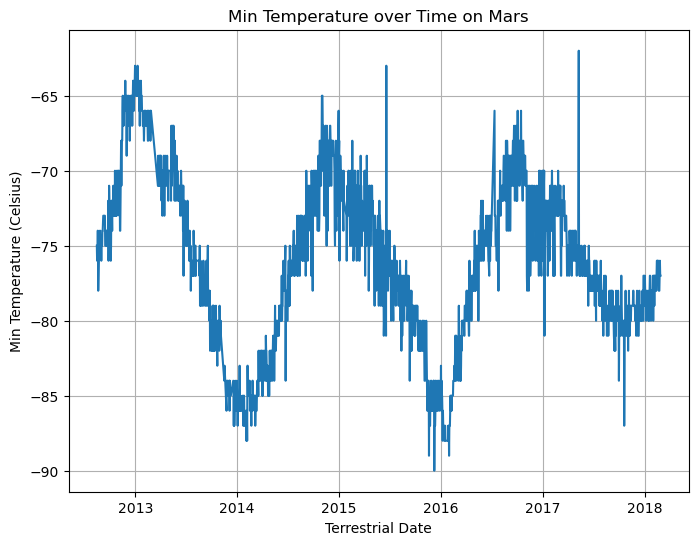

In [105]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days_count = df['terrestrial_date'].nunique()
#terrestria_month =terrestria_month.count_values()
#print(terrestria_month)
plt.figure(figsize=(8, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], linestyle='-')
plt.xlabel('Terrestrial Date')
plt.ylabel('Min Temperature (Celsius)')
plt.title('Min Temperature over Time on Mars')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV
df.to_csv('C:\\Users\\chand\\PythonStuff\\WebScraping\\Mars.csv', index=False)

In [ ]:
browser.quit()